### Chapter 18: Three-dimensional plots

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(0, 6, 0.25)
Y = np.arange(0, 6, 0.25)
X, Y = np.meshgrid(X, Y)

Z1 = np.empty_like(X)
Z2 = np.empty_like(X)

C1 = np.empty_like(X, dtype=object)
C2 = np.empty_like(X, dtype=object)

for i in range(len(X)):
    for j in range(len(X[0])):
        z1 = 0.5*(erf((X[i,j]+Y[i,j]-4.5)*0.5)+1)
        z2 = 0.5*(erf((-X[i,j]-Y[i,j]+4.5)*0.5)+1)
        Z1[i,j] = z1
        Z2[i,j] = z2
        
# If you want to grab a colour from a matplotlib cmap function,
# you need to give it a number between 0 and 1. z1 and z2 are
# already in this range, so it just works as is.
C1[i,j] = plt.get_cmap("Oranges")(z1)
C2[i,j] = plt.get_cmap("Blues")(z2)

# Create a transparent bridge region
X_bridge = np.vstack([X[-1,:],X[-1,:]])
Y_bridge = np.vstack([Y[-1,:],Y[-1,:]])
Z_bridge = np.vstack([Z1[-1,:],Z2[-1,:]])
color_bridge = np.empty_like(Z_bridge, dtype=object)
color_bridge.fill((1,1,1,0)) # RGBA colour, onlt the last component matters - it represents the alpha / opacity.

# Join the two surfaces flipping one of them (using also the bridge)
X_full = np.vstack([X, X_bridge, np.flipud(X)])
Y_full = np.vstack([Y, Y_bridge, np.flipud(Y)])
Z_full = np.vstack([Z1, Z_bridge, np.flipud(Z2)])
color_full = np.vstack([C1, color_bridge, np.flipud(C2)])

surf_full = ax.plot_surface(X_full, 
                            Y_full, 
                            Z_full, 
                            rstride = 1, 
                            cstride = 1,
                            facecolors = color_full, 
                            linewidth = 0,
                            antialiased = False)

plt.show()

### Creating three-dimensional axes

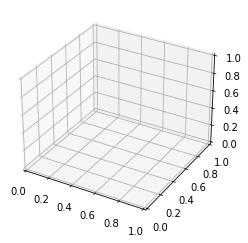

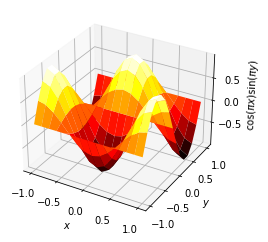

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# generate example data
import numpy as np
x,y = np.meshgrid(np.linspace(-1,1,15),np.linspace(-1,1,15))
z = np.cos(x*np.pi)*np.sin(y*np.pi)

# actual plotting example
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# rstride and cstride are row and column stride (step size)
ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='hot')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$\cos(\pi x) \sin(\pi y)$')

plt.show()

### End.